# Прямые методы решение СЛАУ
## Метод Гаусса и метод Гаусса с выбором главного элемента

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Невязка
def residual(A, X, F):
    return np.linalg.norm(np.dot(A,X) - F)

In [3]:
# Перестановка строк
# params: mod = {'Gauss', 'Gauss_max'}

def permutation(A, F, index, mod='Gauss'):
    prev_index = index
    
    try:
        if mod == 'Gauss':
            while A[index, prev_index] == 0 and index + 1 != A.shape[0]:
                index += 1
        elif mod == 'Gauss_max':
            index = np.nanargmax(np.where(A != 0, np.abs(A), np.NaN)[prev_index:, prev_index], axis=0) + prev_index
            
    except ValueError as error:
        pass
    
    if A[index, prev_index] != 0:
        A_i = np.array(A[index, :])
        F_i = np.array(F[index, :])

        A[index, :] = np.array(A[prev_index, :])
        F[index, :] = np.array(F[prev_index, :])

        A[prev_index, :] = A_i
        F[prev_index, :] = F_i

        return A, F, 1
    
    elif prev_index == 0:
        raise ValueError('Система уравнений не имеет решения')
    
    return A, F, 0

In [4]:
# Решение СЛАУ
# params: mod = {'Gauss', 'Gauss_max'}

def solve_SLE(A, F, mod='Gauss'):
    n = A.shape[0]
    A_copy = np.array(A)
    F_copy = np.array(F)
    
    # Приведение к диагональному виду
    for i in range(1, n):
        for j in range(i, n):
            A_copy, F_copy, flag = permutation(A_copy, F_copy, i - 1, mod)

            if flag:
                F_copy[j, 0] = F_copy[j, 0] - (A_copy[j, i - 1] / A_copy[i - 1, i - 1]) * F_copy[i - 1, 0]
                A_copy[j, :] = A_copy[j, :] - (A_copy[j, i - 1] / A_copy[i - 1, i - 1]) * A_copy[i - 1, :]
    
    
    X = np.zeros((n, 1))
    X[n - 1, 0] = F_copy[n - 1, 0] / A_copy[n - 1, n - 1]   

    for k in range(n - 2, -1, -1):
        amount = 0
        for j in range(k + 1, n):
            amount += X[j, 0] * A_copy[k, j]

        X[k, 0] = (F_copy[k, 0] - amount) / A_copy[k, k]

    return X

## Исходные данные

In [5]:
n = 100

In [6]:
A = np.zeros((n, n))
F = np.zeros(n).reshape((n, 1))

In [7]:
for i in range(n):
    A[i, :] = [random.random() * 10 for _ in range(n)]
    F[i, 0] = random.random() * 10

In [8]:
# print('A = ', A, end='\n\n')
# print('F = ', F, end='\n\n')

## Метод Гаусса

In [9]:
try:
    X = solve_SLE(A, F)
except ValueError as value_error:
    print(value_error)

[[ 5.14005265e+00  6.98035737e+00  5.18606345e-01 ...  6.60513804e+00
   4.22303151e+00  9.46223458e+00]
 [ 0.00000000e+00  1.91824682e-01  3.91712816e+00 ...  4.72098050e-01
   8.28046628e+00 -4.14844089e-01]
 [ 0.00000000e+00  0.00000000e+00  7.33463434e+00 ...  7.14688263e-01
   8.24546044e+00  5.47937798e+00]
 ...
 [-1.01083882e-15  8.01425654e-16 -1.91676829e-14 ... -1.10991179e+01
   1.24486614e+01 -2.76840100e+01]
 [ 1.93466958e-15  1.16696473e-15  2.46342473e-14 ...  0.00000000e+00
  -2.98985662e+01  5.14603512e+01]
 [ 2.08097881e-16  4.70394635e-16 -2.57965126e-14 ...  0.00000000e+00
   0.00000000e+00 -3.20359224e+00]]


In [10]:
residual(A, X, F)

7.259894354648985e-09

## Метод Гаусса с выбором главного элемента

In [11]:
try:
    X = solve_SLE(A, F, mod='Gauss_max')
except ValueError as value_error:
    print(value_error)

[[ 9.93247763e+00  3.45748124e+00  1.84588118e+00 ...  9.92998688e+00
   9.52226827e-01  9.99318599e-01]
 [ 0.00000000e+00  8.71391269e+00  1.19229538e+00 ... -3.22177193e+00
   6.98075860e+00  8.17113928e+00]
 [ 0.00000000e+00 -5.55111512e-17  9.27866834e+00 ...  6.98791590e+00
   2.86320225e+00  2.85567697e+00]
 ...
 [-5.21109097e-16  2.67364043e-16 -8.78872951e-16 ...  1.33235213e+01
  -3.48424483e+00  1.29670272e+01]
 [-8.17564791e-17  6.72465091e-17  3.03790649e-16 ...  0.00000000e+00
   1.39057535e+01 -2.40484958e+01]
 [ 1.48527948e-15  3.54540163e-16 -3.90325287e-16 ...  0.00000000e+00
   0.00000000e+00 -1.30250794e+00]]


In [12]:
residual(A, X, F)

8.201415321751775e-12

### Невязка

#### Зависимость от размерности системы

In [13]:
n_plot = []
rdual1_plot = []
rdual2_plot = []

n = 2

while n < 100:
    n_plot.append(n)
    
    A = np.zeros((n, n))
    F = np.zeros(n).reshape((n, 1))

    for i in range(n):
        A[i, :] = [random.random() * 10 for _ in range(n)]
        F[i, 0] = random.random() * 10
        
    X1 = solve_SLE(A, F)
    X2 = solve_SLE(A, F, mod='Gauss_max')
    
    rdual1_plot.append((residual(A, X1, F)))
    rdual2_plot.append((residual(A, X2, F)))
    n += 3

[[8.96952672 2.99389338]
 [0.         1.07412817]]
[[8.96952672 2.99389338]
 [0.         1.07412817]]
[[ 1.28447913e+00  5.49492495e+00  1.93316476e+00  3.75903374e+00
   4.35523993e+00]
 [ 0.00000000e+00 -1.25351035e+01  3.82054689e-03 -7.38131101e+00
  -1.10580468e+01]
 [ 0.00000000e+00  0.00000000e+00  3.26206861e+00 -3.79656996e+00
   4.59176186e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.23648261e+01
   2.99673258e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  8.88178420e-16
  -3.99626975e+00]]
[[ 9.9693953   4.38879075  2.0475815   9.37447785  1.22278133]
 [ 0.          9.87620991  3.46811248  1.97506734  9.15275452]
 [ 0.          0.          4.16404561  1.25743836 -0.89316768]
 [ 0.          0.          0.         -3.96216484 -3.03600162]
 [ 0.          0.          0.          0.         -1.59765768]]
[[ 2.48539880e+00  6.60845898e+00  6.21358500e-01  4.44808544e-01
   9.12331689e+00  4.29151777e+00  2.13755906e+00  9.40921114e+00]
 [ 0.00000000e+00 -5.94

[[ 7.19111358e+00  4.97401148e+00  8.72480912e+00 ...  5.72830918e+00
   9.05193021e+00  3.14820720e+00]
 [ 0.00000000e+00  2.65884621e+00 -6.18210537e+00 ... -5.58587786e+00
  -7.03724506e+00  7.63243829e-01]
 [ 4.44089210e-16  0.00000000e+00 -3.12484114e+00 ... -1.43595267e+00
  -2.19564763e+00  1.06329637e+00]
 ...
 [ 1.15026048e-15  1.24836394e-15  5.32009253e-15 ... -2.66936242e+01
   3.86327807e+00 -7.18883778e+01]
 [-2.64550280e-17 -1.84589970e-15 -3.07277619e-15 ...  0.00000000e+00
   8.23191832e+00  3.57621806e+01]
 [-6.33630581e-16 -1.10593237e-15 -2.47955862e-15 ...  0.00000000e+00
   0.00000000e+00  4.10857452e+01]]
[[ 9.49260553e+00  1.23960879e+00  5.02144311e+00 ...  1.46457718e+00
   9.37463665e+00  9.77345323e+00]
 [ 0.00000000e+00  8.92937368e+00  5.44415396e+00 ...  2.57111605e+00
   3.01106279e+00  3.73685974e+00]
 [ 0.00000000e+00  0.00000000e+00  7.82822196e+00 ...  3.62727631e+00
  -5.99220413e-01  6.28087854e+00]
 ...
 [ 6.76566171e-16  1.12346538e-15  0.0000000

[[ 9.73742906e+00  6.23911494e+00  7.62230001e+00 ...  6.06127594e+00
   7.09480592e+00  3.84192585e+00]
 [ 0.00000000e+00  8.07451748e+00  7.52274221e+00 ...  4.69452165e+00
   3.52498973e+00  2.61769755e-01]
 [ 0.00000000e+00  0.00000000e+00 -9.47673409e+00 ... -5.32583451e+00
   8.95567286e-01 -3.47840807e-01]
 ...
 [ 3.61295808e-16 -7.72041684e-17 -4.56390803e-16 ...  2.41036631e+00
  -7.28416815e+00  5.98926965e-01]
 [-2.95767293e-16  3.42244444e-16  4.77066440e-16 ...  0.00000000e+00
   6.03961870e+00 -1.15971413e+01]
 [ 6.54429329e-16 -5.04492183e-16 -9.96702853e-16 ...  0.00000000e+00
   0.00000000e+00  1.04543372e+01]]
[[ 7.02681635e+00  5.52987922e+00  7.09751962e+00 ...  5.42967771e+00
   5.58865098e+00  5.43560209e+00]
 [ 0.00000000e+00  1.05392343e+00  3.77038505e+00 ...  5.15596783e+00
   8.33663214e+00  8.39119403e+00]
 [ 0.00000000e+00  0.00000000e+00 -6.16699662e+00 ... -1.42248061e+01
  -1.46100360e+01 -1.81638025e+01]
 ...
 [-4.81008414e-15  8.78374273e-15  7.2223474

[[ 9.84235915e+00  8.49475204e-01  5.49125269e+00 ...  6.35698482e+00
   2.24477924e+00  4.90135170e+00]
 [ 0.00000000e+00  9.36552387e+00 -3.79498562e+00 ...  4.17226692e+00
   1.24445195e+00 -3.36211523e+00]
 [ 0.00000000e+00  0.00000000e+00  1.15101137e+01 ...  2.94671928e+00
   4.43730393e+00  4.34221251e+00]
 ...
 [-1.47210634e-15 -1.10656937e-16  8.80504284e-16 ...  9.13654714e+00
  -6.12916783e+00  5.50274472e+00]
 [ 6.53974914e-16  5.35160681e-17  5.80474809e-16 ...  0.00000000e+00
  -2.90990778e+00 -1.06298699e+01]
 [-8.46791641e-16  4.02826836e-16 -1.28403739e-15 ...  0.00000000e+00
   0.00000000e+00 -1.90698419e+01]]
[[ 3.61588680e+00  5.89792313e+00  9.09669171e+00 ...  2.77679875e+00
   3.75946611e+00  2.63557104e+00]
 [ 0.00000000e+00 -1.11936908e+01 -1.75409023e+01 ... -6.74783849e+00
  -7.31592323e+00  1.18066873e-02]
 [ 0.00000000e+00  0.00000000e+00 -2.69211438e+00 ... -3.13970860e-01
   2.24162613e+00  3.45857234e+00]
 ...
 [ 5.22526613e-15 -1.83979168e-14  1.7713524

[[ 9.84852055e+00  7.07578089e+00  1.28028957e+00 ...  7.55002583e+00
   4.65640246e+00  8.61459619e+00]
 [ 0.00000000e+00  9.20426119e+00  5.62547499e+00 ...  9.19209017e+00
   3.90342299e-01  8.17449113e+00]
 [ 0.00000000e+00  0.00000000e+00  1.15961494e+01 ...  3.74985169e+00
   5.23458926e+00  2.69408094e+00]
 ...
 [-7.28198495e-16 -4.86109138e-16  8.48567161e-16 ... -2.03951981e+00
  -1.05724021e+01 -8.22016872e+00]
 [ 1.26676904e-15 -2.73478552e-16 -5.62219735e-16 ...  0.00000000e+00
   2.52002618e+01 -1.39014572e+00]
 [-4.59637690e-16  3.51981979e-16 -6.90736391e-16 ...  0.00000000e+00
   0.00000000e+00  1.39124300e+01]]


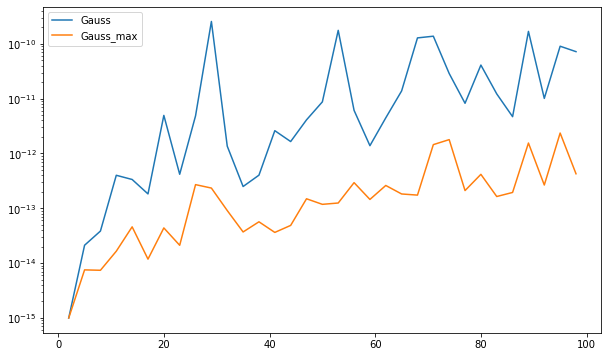

In [14]:
plt.figure(figsize=(10, 6))
plt.semilogy(n_plot, rdual1_plot, label='Gauss')
plt.semilogy(n_plot, rdual2_plot, label='Gauss_max')
plt.legend()